# Experimentation of the paper

This notebook contains all the experimentation shown in the paper ().

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from qudo_solver.qudo_solver_core.qubo_solvers import ortools_qudo_solver
from qudo_solver.qudo_solver_core.qubo_auxiliar_functions import qudo_evaluation, generate_k_qubo, normalize_list_of_lists, qubo_value_from_lists, qubo_list_to_matrix
from qudo_solver.qubo_k_neighbors_matrix_optimized import qubo_solver_matrix
from qudo_solver.qubo_k_neighbors_tensorkrowch_optimized import qubo_solver_tensor
from time import time
%load_ext autoreload
%autoreload 2

In [9]:
def plot_function(data_1, data_2, axes_x_name, axes_y_name, color = 'blue', marker ='o', title = None, label = None, format='pdf'):
    plt.figure("figura")
    plt.plot(data_1, data_2, marker = marker, linestyle = '-', color = color, label = label)
    #plt.axhline(y=0, color='gray', linestyle='--', linewidth=3)
    plt.xlabel(axes_x_name)
    plt.ylabel(axes_y_name)
    #plt.yscale("exp")
    plt.tight_layout()
    plt.legend()
    plt.savefig(title, format=format, dpi=300)

### Execution time vs number of neighbors $k$.

In [6]:
def n_variables_time(dits: int, tau: float, n_variables: int, n_neighbors_max: int, n_iter: int, repetitions: int, method: str):
    n_vec = []
    times=[]
    n_neighbors_range = np.linspace(1, n_neighbors_max, n_iter)
    for n_neigh in n_neighbors_range:
        times_aux = []
        for i in range(repetitions):
            n_neigh = int(n_neigh)
            seed = 170
            Q_matrix_list = generate_k_qubo(n_variables, n_neigh, seed)
            Q_matrix_list = normalize_list_of_lists(Q_matrix_list)
            if method == 'tensor':
                inital_time = time()
                _t = qubo_solver_tensor(Q_matrix_list, tau, dits, n_neigh)
                time_ = time() - inital_time
            elif method == 'matrix':
                inital_time = time()
                _t = qubo_solver_matrix(Q_matrix_list, tau, dits, n_neigh)
                time_ = time() - inital_time
            times_aux.append(time_)
            # print('Tensor Network cost:     ', qubo_value_from_lists(solution, Q_matrix_list))
        n_vec.append(n_neigh)
        times.append(np.mean(times_aux))
        # times_ortools.append(np.mean(times_ortools_aux))
    return times, n_vec

In [ ]:
n_variables = 100
dits = 2
tau = 400
n_neighbors_max = 15
iter = 15
repetitions = 15

time_tensor, n_variables_tensor = n_variables_time(dits, tau, n_variables, n_neighbors_max, iter, repetitions, 'tensor')
time_matrix, n_variables_matrix = n_variables_time(dits, tau, n_variables, n_neighbors_max, iter, repetitions, 'matrix')

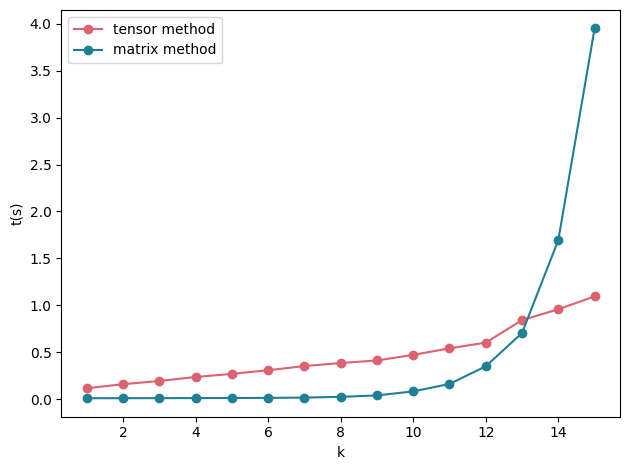

In [ ]:

plot_function(n_variables_tensor, time_tensor, "k", "t(s)",title="paper_graphs/n_neighbors-time.pdf", color = '#db636f', label= 'tensor method' )
plot_function(n_variables_matrix, time_matrix, "k", "t(s)",title="paper_graphs/n_neighbors-time.pdf", color ='#1f7f95', label= 'matrix method')

### Execution time vs digits $d$

In [14]:
def dits_time(max_dits: int, tau: float, n_variables: int, n_neighbors: int, n_iter: int, repetitions: int, method: str):
    n_dits = []
    times = []
    dits_range = np.linspace(1, max_dits, n_iter)
    for dit in dits_range:
        aux_time = []
        for _ in range(repetitions):
            dit = int(dit)
            seed = 170
            Q_matrix_list = generate_k_qubo(n_variables, n_neighbors, seed)
            Q_matrix = normalize_list_of_lists(Q_matrix_list)
            if method == 'tensor':
                initial_time = time()
                _ = qubo_solver_tensor(Q_matrix, tau, dit, n_neighbors)
                time_ = time()-initial_time
            elif method == 'matrix':
                initial_time = time()
                _ = qubo_solver_matrix(Q_matrix, tau, dit, n_neighbors)
                time_ = time()-initial_time
            aux_time.append(time_)
        n_dits.append(dit)
        times.append(np.mean(aux_time))
    return times, n_dits

In [15]:
n_variables = 1000
tau = 25
vecinos = 2
iter = 30
repetitions = 5
max_dits = 30
time_tensor, dits_tensor = dits_time(max_dits, tau, n_variables, vecinos, iter, repetitions, 'tensor')
time_matrix, dits_matrix = dits_time(max_dits, tau, n_variables, vecinos, iter, repetitions, 'matrix')


C:\Users\sergio.muniz\Desktop\Sergio\Proyectos\QuantumCript\QUDO_solver\qudo_solver\qubo_k_neighbors_matrix_optimized.py:251: RuntimeWarning: invalid value encountered in divide
  tensor /= np.linalg.norm(tensor)  # Normalize the tensor after multiplication
C:\Users\sergio.muniz\Desktop\Sergio\Proyectos\QuantumCript\QUDO_solver\qudo_solver\qubo_k_neighbors_matrix_optimized.py:101: RuntimeWarning: overflow encountered in exp
  data_mat = np.exp(-tau * exponents)
C:\Users\sergio.muniz\Desktop\Sergio\Proyectos\QuantumCript\QUDO_solver\qudo_solver\qubo_k_neighbors_matrix_optimized.py:138: RuntimeWarning: overflow encountered in scalar multiply
  tensor_aux *= np.exp(-tau * Q_matrix_row[el] * full_element[el] * full_element[-1])
C:\Users\sergio.muniz\Desktop\Sergio\Proyectos\QuantumCript\QUDO_solver\qudo_solver\qubo_k_neighbors_matrix_optimized.py:292: RuntimeWarning: invalid value encountered in matmul
  solution[node] = np.argmax(abs(new_tensor @ intermediate_tensors[2]))


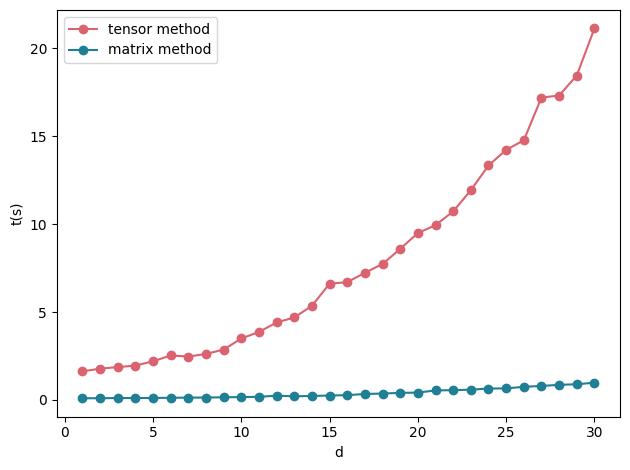

In [16]:
plot_function(dits_tensor, time_tensor, "d", "t(s)",title = "paper_graphs/dits-time.pdf", color = '#db636f', label = 'tensor method' )
plot_function(dits_matrix, time_matrix, "d", "t(s)",title = "paper_graphs/dits-time.pdf", color = '#1f7f95', label = 'matrix method')

### Execution time vs number of variables $n$ for a QUDO problem with 2 neighbors and $\tau  = 50$ for different values of $d$

In [ ]:
def n_variables_time(dits: int, tau: float, n_variables_max: int, n_neighbors: int, n_iter: int, repetitions: int, method: str):
    n_variables = []
    times = []
    n_variables_range = np.linspace(10, n_variables_max, n_iter)
    for n_variable in n_variables_range:
        times_aux = []
        for i in range(repetitions):
            n_variable = int(n_variable)
            seed = 170
            Q_matrix_list = generate_k_qubo(n_variable, n_neighbors, seed)
            Q_matrix_list = normalize_list_of_lists(Q_matrix_list) 
            if method == 'tensor':
                initial_time = time()
                _t = qubo_solver_tensor(Q_matrix_list, tau, dits, n_neighbors)
                time_ = time() - initial_time
            elif method == 'matrix':
                initial_time = time()
                _t = qubo_solver_matrix(Q_matrix_list, tau, dits, n_neighbors)
                time_ = time() - initial_time
            times_aux.append(time_)
        n_variables.append(n_variable)
        times.append(np.mean(times_aux))
    return times, n_variables

In [ ]:
tau = 50
n_variables_max = 2000
n_neighbors = 2
n_iter = 10
repetitions = 10
max_dits = 9
dits = np.arange(2,max_dits)
time_tensor =[0]*(max_dits-2)
n_variables_tensor = [0]*(max_dits-2)
time_matrix =[0]*(max_dits-2)
n_variables_matrix = [0]*(max_dits-2)
for index, dit in enumerate(dits):
    print(dit)
    time_tensor[index], n_variables_tensor[index] = n_variables_time(int(dit), tau, n_variables_max, n_neighbors, n_iter, repetitions, 'tensor')
    time_matrix[index], n_variables_matrix[index] = n_variables_time(int(dit), tau, n_variables_max, n_neighbors, n_iter, repetitions, 'matrix')

[0.011085772514343261, 0.3789562940597534, 0.732520580291748, 1.1129464864730836, 1.454911994934082, 1.8392563104629516, 2.184569764137268, 2.5836403131484986, 3.0141798496246337, 3.3970741271972655]
[0.025919461250305177, 0.4271509885787964, 0.7794700145721436, 1.1941071987152099, 1.535999846458435, 1.9900129079818725, 2.359806990623474, 2.7459288358688356, 3.1357096910476683, 3.5954717636108398]
[0.013139939308166504, 0.4562967300415039, 0.835785698890686, 1.2569108963012696, 1.6567685842514037, 2.139936017990112, 2.5597490310668944, 3.0828726291656494, 3.631610798835754, 3.9854848861694334]
[0.015825676918029784, 0.5142401218414306, 0.9731713056564331, 1.4215730905532837, 1.8946981191635133, 2.2868446111679077, 3.1749009609222414, 3.348217248916626, 3.782278871536255, 4.262326455116272]
[0.017595911026000978, 0.5701031684875488, 1.0443497180938721, 1.552838110923767, 2.109272861480713, 2.6492429256439207, 3.1042975187301636, 3.5454599857330322, 4.053800344467163, 4.6305176496505736]

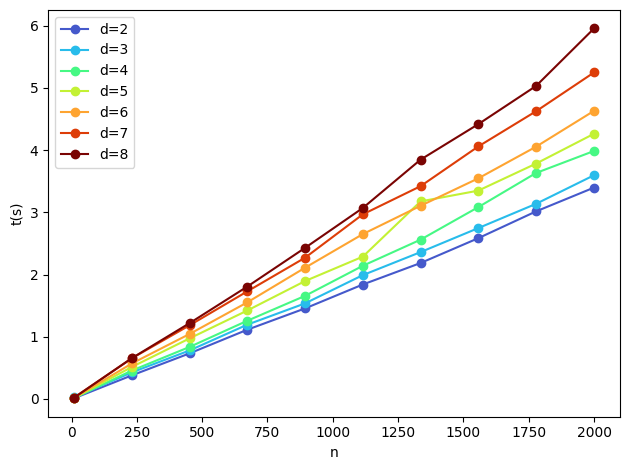

In [ ]:
marker_list = ['o','s','v','*','d', 'P', 'X', '^']
cmap = plt.cm.turbo
gradient = np.linspace(0.1, 1, 7)
for index, element in enumerate(time_tensor):  
    plot_function(np.array(n_variables_tensor[0]), np.array(element), "n", "t(s)", title = "paper_graphs/n_variables_time_with_k_tensor.pdf", color = cmap(gradient[index]), label= f'd={index+2}')

[0.00110626220703125, 0.02423567771911621, 0.045728421211242674, 0.07243950366973877, 0.09631750583648682, 0.11453189849853515, 0.1526235580444336, 0.16336045265197754, 0.19525487422943116, 0.3048995494842529]
[0.001152348518371582, 0.02440299987792969, 0.04770286083221435, 0.06929512023925781, 0.09301493167877198, 0.11651356220245361, 0.13879640102386476, 0.16314389705657958, 0.18624610900878907, 0.216027569770813]
[0.0012080669403076172, 0.03418221473693848, 0.051113224029541014, 0.07942230701446533, 0.09908912181854249, 0.12658116817474366, 0.1585848569869995, 0.1732854127883911, 0.19482035636901857, 0.2195208787918091]
[0.0017270803451538085, 0.031231141090393065, 0.05669999122619629, 0.08026294708251953, 0.10537636280059814, 0.13230361938476562, 0.16359331607818603, 0.1848201036453247, 0.2124239683151245, 0.24627993106842042]
[0.001748943328857422, 0.030809545516967775, 0.05883183479309082, 0.08394827842712402, 0.11159694194793701, 0.14139351844787598, 0.17834072113037108, 0.22522

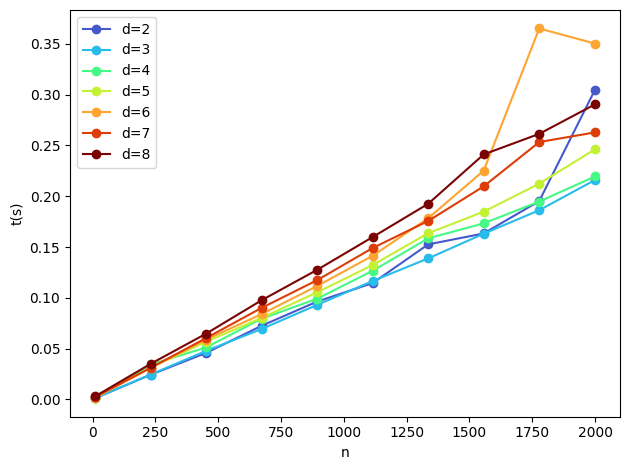

In [ ]:
marker_list = ['o','s','v','*','d', 'P', 'X', '^']
cmap = plt.cm.turbo
gradient = np.linspace(0.1, 1, 7)
for index, element in enumerate(time_matrix):  
    plot_function(np.array(n_variables_matrix[0]), np.array(element), "n", "t(s)", title = "paper_graphs/n_variables_time_with_k_tensor.pdf", color = cmap(gradient[index]), label= f'd={index+2}')

### Execution time vs number of variables $n$ for a QUDO problem with $d=2$ and $\tau  = 50$ for different values of $k$

In [7]:
dimensions = 2
tau = 50
n_variables_max = 2000
n_iter = 10
repetitions = 5
max_neighbors = 8
n_neighbors = np.arange(2, max_neighbors)
time_tensor =[0]*(max_neighbors - 2)
n_variables_tensor = [0]*(max_neighbors - 2)
time_matrix =[0]*(max_neighbors - 2)
n_variables_matrix = [0]*(max_neighbors - 2)
for index, vec in enumerate(n_neighbors):
    print(vec)
    time_tensor[index], n_variables_tensor[index] = n_variables_time(dimensions, tau, n_variables_max, int(vec), n_iter, repetitions, 'tensor')
    time_matrix[index], n_variables_matrix[index] = n_variables_time(dimensions, tau, n_variables_max, int(vec), n_iter, repetitions, 'matrix')

2
3
4
5
6
7


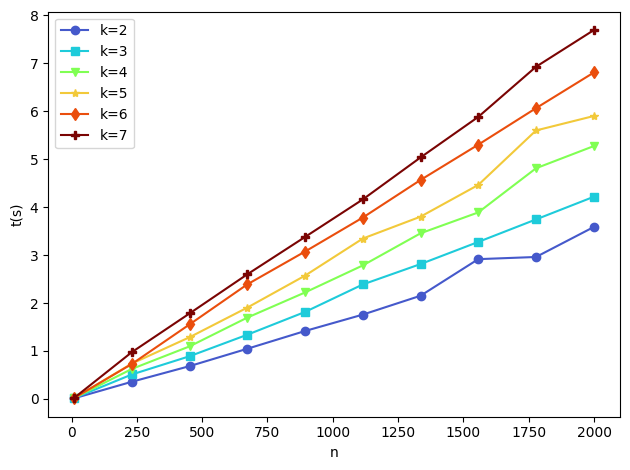

In [10]:

marker_list = ['o','s','v','*','d', 'P', 'X', '^']
cmap = plt.cm.turbo
gradient = np.linspace(0.1, 1, 6)
for index, element in enumerate(time_tensor):  
    plot_function(np.array(n_variables_tensor[0]), np.array(element), "n", "t(s)",title = "paper_graphs/n_variables_time_with_d_tensor.pdf", color = cmap(gradient[index]), label = f'k={index+2}', marker = marker_list[index])


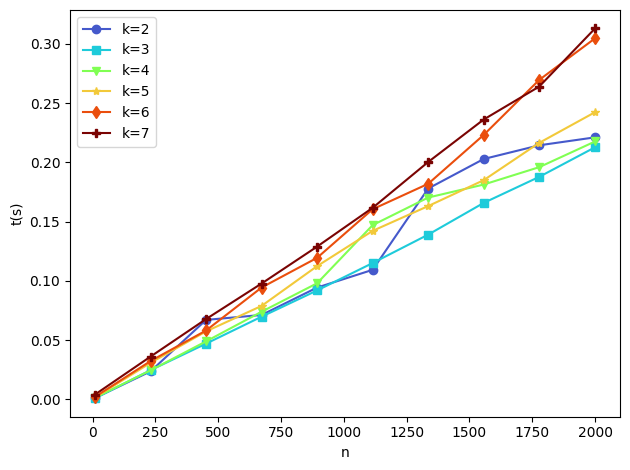

In [12]:
marker_list = ['o','s','v','*','d', 'P', 'X', '^']
cmap = plt.cm.turbo

gradient = np.linspace(0.1, 1, 6)
for index, element in enumerate(time_matrix):  
    plot_function(np.array(n_variables_matrix[0]), np.array(element), "n", "t(s)",title="paper_graphs/n_variables_time_with_d_matrix.pdf", color = cmap(gradient[index]), label = f'k={index+2}', marker = marker_list[index])


### Relative error $\epsilon_{relative} = 1 - \frac{C(\vec{x}_{tn})}{C(\vec{x}_{OR})}$ vs number of variables $n$ in function of $d$

In [ ]:
def n_variables_performance(dits, n_variables_max, n_neighbors, n_iter, tau_max):
    n_variables = []
    relative_error = []
    n_variables_range = np.linspace(10, n_variables_max, n_iter)
    n_tau_range = np.linspace(1, tau_max, 15)
    for n_variable in n_variables_range:
        coste_tn_aux = 0 
        for t in n_tau_range:
            n_variable = int(n_variable)
            seed = 3
            Q_matrix_list = generate_k_qubo(n_variable, n_neighbors, seed)
            Q_matrix_list = normalize_list_of_lists(Q_matrix_list) 
            _t = qubo_solver_matrix(Q_matrix_list, t, dits, n_neighbors)
            coste_tn = qubo_value_from_lists(_t, Q_matrix_list)
            if coste_tn < coste_tn_aux:
                coste_tn_aux = coste_tn
        Q_matrix = qubo_list_to_matrix(Q_matrix_list)
        _o = ortools_qudo_solver(Q_matrix, dits, time = 5)
        coste_ot = qudo_evaluation(Q_matrix, _o)
        r_error = 1 - coste_tn_aux/coste_ot
        relative_error.append(r_error)
        n_variables.append(n_variable)
    
    return relative_error, n_variables

In [ ]:
n_variables_max = 1000
n_neighbors = 2
n_iter = 10
tau_max = 700
max_dits = 7
dits = np.arange(2,max_dits)
relative_error =[0]*(max_dits-2)
n_variables = [0]*(max_dits-2)
for index, dit in enumerate(dits):
    relative_error[index], n_variables[index] = n_variables_performance(dit, n_variables_max, n_neighbors, n_iter, tau_max)

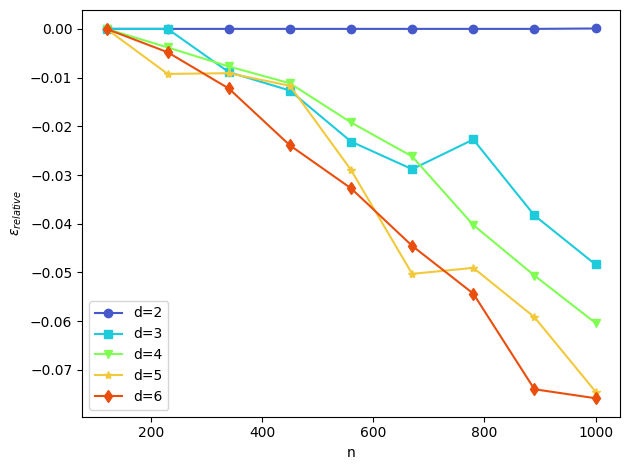

In [43]:
marker_list = ['o','s','v','*','d', 'P', 'X', '^']
cmap = plt.cm.turbo
gradient = np.linspace(0.1, 1, 6)
for index, element in enumerate(relative_error):  
  
    plot_function(np.array(n_variables[0][1:]), np.array(element[1:]), "n", r"$\epsilon_{relative}$", title = "paper_graphs/relative_error_dits.pdf", color = cmap(gradient[index]), label = f'd={index+2}', marker = marker_list[index])

### Relative error $\epsilon_{relative} = 1 - \frac{C(\vec{x}_{tn})}{C(\vec{x}_{OR})}$ vs number of variables $n$ in function of $k$

In [ ]:
n_variables_max = 1000
dits = 2
n_iter = 10
tau_max = 700
max_neighbors = 7
neighbors = np.arange(2, max_neighbors)
relative_error =[0]*(max_neighbors-2)
n_variables = [0]*(max_neighbors-2)
for index, neighbor in enumerate(neighbors):
    relative_error[index], n_variables[index] = n_variables_performance(dits, n_variables_max, neighbor, n_iter, tau_max)

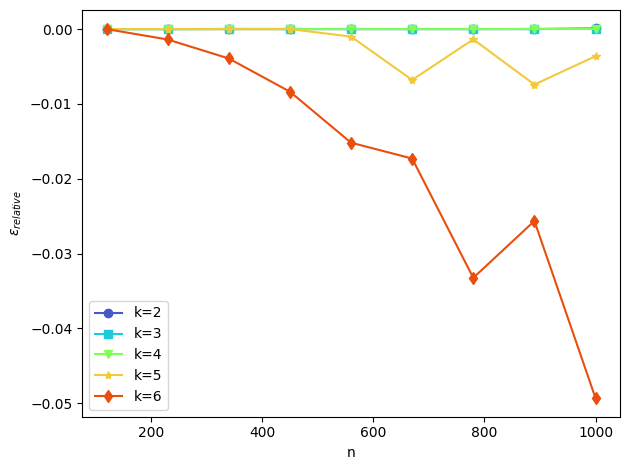

In [45]:
marker_list = ['o','s','v','*','d', 'P', 'X', '^']
cmap = plt.cm.turbo

gradient = np.linspace(0.1, 1, 6)
for index, element in enumerate(relative_error):  
    plot_function(np.array(n_variables[0][1:]), np.array(element[1:]), "n", r"$\epsilon_{relative}$",title="paper_graphs/relative_error_neighbors.pdf", color = cmap(gradient[index]), label = f'k={index+2}', marker = marker_list[index])